In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv("train.csv")

In [9]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [10]:
df1=df.drop(["Id","Behaviour"],axis=1)

In [11]:
df1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,14,3,0,12,2,11,7,6,7,4
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,12,3,2,7,2,3,2,1,1,2
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,16,3,0,12,3,9,7,7,3,5
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,13,3,0,18,2,7,7,1,7,4
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,15,3,1,10,2,10,7,7,8,1


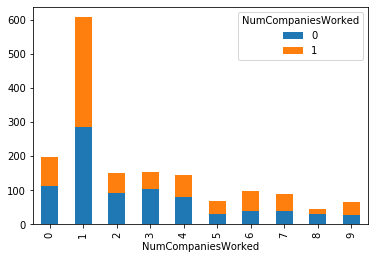

In [12]:
comp_1=pd.crosstab(df1.NumCompaniesWorked,df1.Attrition)
comp_1.plot.bar(stacked=True)
plt.legend(title='NumCompaniesWorked')
plt.show()

In [7]:
comp_1


Attrition,0,1
NumCompaniesWorked,,
0,113,85
1,287,320
2,92,60
3,104,50
4,81,65
5,30,40
6,38,60
7,40,50
8,31,15


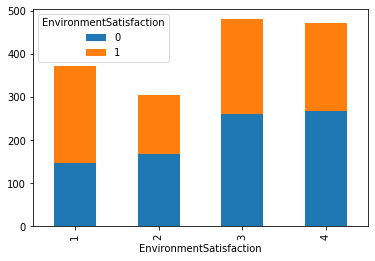

In [8]:
comp_2=pd.crosstab(df1.EnvironmentSatisfaction,df1.Attrition)
comp_2.plot.bar(stacked=True)
plt.legend(title='EnvironmentSatisfaction')
plt.show()

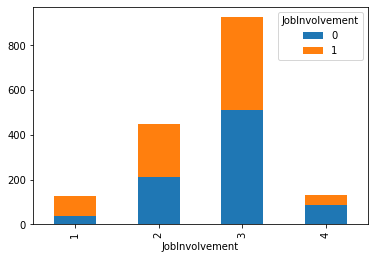

In [9]:
comp_3=pd.crosstab(df1.JobInvolvement,df1.Attrition)
comp_3.plot.bar(stacked=True)
plt.legend(title='JobInvolvement')
plt.show()

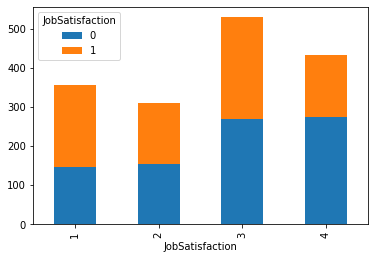

In [10]:
comp_3=pd.crosstab(df1.JobSatisfaction,df1.Attrition)
comp_3.plot.bar(stacked=True)
plt.legend(title='JobSatisfaction')
plt.show()

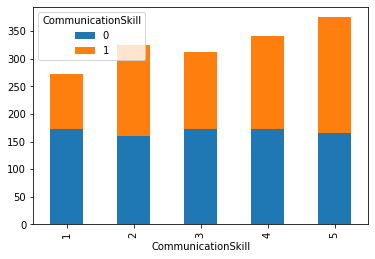

In [11]:
comp_4=pd.crosstab(df1.CommunicationSkill,df1.Attrition)
comp_4.plot.bar(stacked=True)
plt.legend(title='CommunicationSkill')
plt.show()

In [12]:
group_1=df1.groupby('Attrition').agg({'EmployeeNumber':['mean','min','max']})

In [14]:
group_1

EmployeeNumber          
                    mean min   max
Attrition                         
0            1030.077106   2  2068
1             969.745223   1  2055

In [15]:
gp2=df1.groupby('Attrition').EmployeeNumber
gp2.groups

{0: Int64Index([  0,   1,   3,   4,   5,   7,   8,  10,  11,  12,
             ...
             988, 989, 990, 991, 992, 994, 995, 996, 998, 999],
            dtype='int64', length=843),
 1: Int64Index([   2,    6,    9,   14,   16,   39,   45,   52,   54,   57,
             ...
             1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627],
            dtype='int64', length=785)}

In [16]:
gp3=df1[df1.Attrition==1].EmployeeNumber
gp3

2        842
6        331
9       1780
14       342
16      1862
        ... 
1623     752
1624     842
1625    1439
1626    1844
1627     315
Name: EmployeeNumber, Length: 785, dtype: int64

(array([ 70.,  80.,  95.,  85., 115.,  85.,  70.,  65.,  75.,  45.]),
 array([1.0000e+00, 2.0640e+02, 4.1180e+02, 6.1720e+02, 8.2260e+02,
        1.0280e+03, 1.2334e+03, 1.4388e+03, 1.6442e+03, 1.8496e+03,
        2.0550e+03]),
 <a list of 10 Patch objects>)

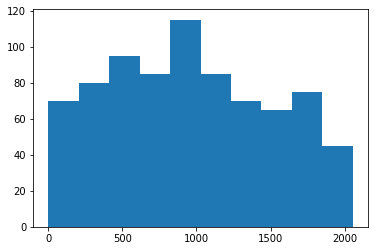

In [17]:
plt.hist(gp3,bins=10)

In [6]:
df2=df1[['PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [7]:
df2.head()

,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,14,12,2,11,7,6,7
1,12,7,2,3,2,1,1
2,16,12,3,9,7,7,3
3,13,18,2,7,7,1,7
4,15,10,2,10,7,7,8


In [8]:
df2.corr()

,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PercentSalaryHike,1.000000,0.006266,0.008500,0.002299,0.029127,-0.036528,0.020399
TotalWorkingYears,0.006266,1.000000,-0.018783,0.667632,0.504922,0.395785,0.515849
TrainingTimesLastYear,0.008500,-0.018783,1.000000,-0.001098,-0.008939,-0.019341,-0.015937
YearsAtCompany,0.002299,0.667632,-0.001098,1.000000,0.771813,0.607823,0.803554
YearsInCurrentRole,0.029127,0.504922,-0.008939,0.771813,1.000000,0.568734,0.733661
YearsSinceLastPromotion,-0.036528,0.395785,-0.019341,0.607823,0.568734,1.000000,0.589437
YearsWithCurrManager,0.020399,0.515849,-0.015937,0.803554,0.733661,0.589437,1.000000


In [9]:
df3=df1[['Age','DistanceFromHome','EmployeeNumber','MonthlyIncome']]

In [10]:
df3.head()

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome
0,30,2,571,2564
1,36,12,1614,4663
2,55,2,842,5160
3,39,24,2014,4108
4,37,3,689,9434


In [11]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

In [12]:
df4=df1[['Age','DistanceFromHome','EmployeeNumber','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [13]:
df4.head()

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,2,571,2564,14,12,2,11,7,6,7
1,36,12,1614,4663,12,7,2,3,2,1,1
2,55,2,842,5160,16,12,3,9,7,7,3
3,39,24,2014,4108,13,18,2,7,7,1,7
4,37,3,689,9434,15,10,2,10,7,7,8


In [14]:
from sklearn.preprocessing import StandardScaler
standanderd_data=StandardScaler().fit_transform(df4)

In [15]:
standanderd_data.shape

(1628, 11)

In [16]:
sample_data=standanderd_data


In [17]:
from sklearn import decomposition
pca=decomposition.PCA()

In [18]:
pca.n_components=7
pca_data=pca.fit_transform(sample_data)
pca_data.shape

(1628, 7)

In [19]:
pca_df=pd.DataFrame(data=pca_data,columns=('1','2','3','4','5','6','7'))
pca_df.head()

,1,2,3,4,5,6,7
0,1.233292,-1.924343,-0.225125,0.559337,-0.945558,0.001146,-0.384290
1,-1.032468,0.312274,-0.657422,-1.381181,-0.122750,-0.079613,-0.177243
2,1.701089,0.179541,-0.438226,0.822403,-0.073498,0.487262,-1.931277
3,1.187504,0.178944,0.492905,-2.399986,0.476782,-0.392511,0.485773
4,2.052533,-1.114822,-0.190087,0.473320,-0.880729,0.144564,-0.460026


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df5=df1[['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']].apply(le.fit_transform)

In [21]:
df5.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,0,1,3,2,2,0
1,2,1,1,4,1,1
2,2,2,3,7,2,0
3,2,1,1,6,2,0
4,2,1,4,4,1,0


In [22]:
df5.dtypes

BusinessTravel    int32
Department        int32
EducationField    int32
JobRole           int32
MaritalStatus     int32
OverTime          int32
dtype: object

In [23]:
np.array(df5)

array([[0, 1, 3, 2, 2, 0],
       [2, 1, 1, 4, 1, 1],
       [2, 2, 3, 7, 2, 0],
       ...,
       [2, 2, 1, 8, 1, 0],
       [2, 0, 0, 1, 0, 1],
       [2, 1, 3, 6, 2, 1]])

In [24]:
np.array(df5)+1

array([[1, 2, 4, 3, 3, 1],
       [3, 2, 2, 5, 2, 2],
       [3, 3, 4, 8, 3, 1],
       ...,
       [3, 3, 2, 9, 2, 1],
       [3, 1, 1, 2, 1, 2],
       [3, 2, 4, 7, 3, 2]])

In [25]:
df6=pd.DataFrame(data=np.array(df5)+1,columns=('BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime'))

In [26]:
df6.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,1,2,4,3,3,1
1,3,2,2,5,2,2
2,3,3,4,8,3,1
3,3,2,2,7,3,1
4,3,2,5,5,2,1


In [27]:
pca_df.describe()

,1,2,3,4,5,6,7
count,1.628000e+03,1.628000e+03,1.628000e+03,1.628000e+03,1.628000e+03,1.628000e+03,1.628000e+03
mean,-4.964634e-17,7.112792e-17,5.435183e-17,-8.647192e-17,2.966505e-17,3.437054e-17,-5.114664e-18
std,2.044643e+00,1.119823e+00,1.050361e+00,1.027681e+00,9.960992e-01,9.225058e-01,7.080670e-01
min,-2.963150e+00,-3.173016e+00,-2.427151e+00,-2.704513e+00,-2.849927e+00,-2.604306e+00,-2.230411e+00
25%,-1.422852e+00,-6.979492e-01,-8.169707e-01,-7.923837e-01,-6.142248e-01,-6.006328e-01,-3.850390e-01
50%,-5.722990e-01,-1.971641e-01,-9.681320e-02,-3.500250e-02,-9.650833e-02,1.605615e-02,3.749814e-02
75%,1.197143e+00,6.093626e-01,6.822621e-01,7.434629e-01,6.215902e-01,5.941752e-01,4.265711e-01
max,8.142982e+00,4.553824e+00,3.899180e+00,2.735165e+00,3.077243e+00,2.871911e+00,2.822427e+00


In [28]:
bins_1=[-3,0,3,6,9]
bins_2=[-4,-2,0,2,5]
bins_3=[-3,-1.25,0.5,2.25,4]
bins_4=[-3,-1.5,0,1.5,3]
bins_5=[-3,-1.25,0.5,2.25,4]
bins_6=[-3,-1.5,0,1.5,3]
bins_7=[-3,-1.5,0,1.5,3]
labels=[1,2,3,4]
pca_df['data_1']=pd.cut(pca_df['1'],bins_1,labels=labels)
pca_df['data_2']=pd.cut(pca_df['2'],bins_2,labels=labels)
pca_df['data_3']=pd.cut(pca_df['3'],bins_3,labels=labels)
pca_df['data_4']=pd.cut(pca_df['4'],bins_4,labels=labels)
pca_df['data_5']=pd.cut(pca_df['5'],bins_5,labels=labels)
pca_df['data_6']=pd.cut(pca_df['6'],bins_6,labels=labels)
pca_df['data_7']=pd.cut(pca_df['7'],bins_7,labels=labels)

In [29]:
pca_df.head()

,1,2,3,4,5,6,7,data_1,data_2,data_3,data_4,data_5,data_6,data_7
0,1.233292,-1.924343,-0.225125,0.559337,-0.945558,0.001146,-0.384290,2,2,2,3,2,3,2
1,-1.032468,0.312274,-0.657422,-1.381181,-0.122750,-0.079613,-0.177243,1,3,2,2,2,2,2
2,1.701089,0.179541,-0.438226,0.822403,-0.073498,0.487262,-1.931277,2,3,2,3,2,3,1
3,1.187504,0.178944,0.492905,-2.399986,0.476782,-0.392511,0.485773,2,3,2,1,2,2,3
4,2.052533,-1.114822,-0.190087,0.473320,-0.880729,0.144564,-0.460026,2,2,2,3,2,3,2


In [30]:
df7=pca_df.drop(['1','2','3','4','5','6','7'],axis=1)

In [31]:
df7.head()

,data_1,data_2,data_3,data_4,data_5,data_6,data_7
0,2,2,2,3,2,3,2
1,1,3,2,2,2,2,2
2,2,3,2,3,2,3,1
3,2,3,2,1,2,2,3
4,2,2,2,3,2,3,2


In [32]:
df8=df1[['Attrition','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','StockOptionLevel','CommunicationSkill']]

In [33]:
df8.head()

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,CommunicationSkill
0,0,3,3,4,0,4
1,0,3,3,3,2,2
2,1,3,3,4,0,5
3,0,1,3,4,0,4
4,0,3,3,3,1,1


In [34]:
df9=pd.merge(df8,df6,left_on='Attrition',right_on='BusinessTravel')

In [35]:
df9.head()

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,CommunicationSkill,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,1,3,3,4,0,5,1,2,4,3,3,1
1,1,3,3,4,0,5,1,2,4,5,1,1
2,1,3,3,4,0,5,1,2,4,3,1,1
3,1,3,3,4,0,5,1,2,6,7,2,1
4,1,3,3,4,0,5,1,3,4,8,1,1


In [ ]:
df_final=pd.merge(df9,df7,)